<a href="https://colab.research.google.com/github/lkarjun/Data-Science-from-Scratch/blob/master/8%20Gradient%20Decend/Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from typing import List, Callable
import matplotlib.pyplot as plt

## Linear Algebra functions

In [12]:
import math

def subtract(v: Vector, w: Vector) -> Vector:
    assert len(v) == len(w), 'vectors must be the same lenght'
    return [
        v_i - w_i for v_i, w_i in zip(v, w)   
           ]

def add(v: Vector, w: Vector) -> Vector:
    assert len(v) == len(w), 'vectors must be the same lenght'
    return [
        v_i + w_i for v_i, w_i in zip(v, w)   
           ]

assert add([1,2,3], [4,5,6]) == [5,7,9], 'not expected data'


def scalar_multiply(c: float, v: Vector) -> Vector:
    return [c * v_i for v_i in v]

assert scalar_multiply(2.0,[1,2,3]) == [2,4,6], 'didnot match the expected data'

def dot(v: Vector, w: Vector) -> float:
    assert len(v) == len(w), 'len of vectors dont match'
    return sum(v_i * w_i for v_i, w_i in zip(v,w))

assert dot([1,2,3], [4,5,6]) == 32

def sum_of_squares(v: Vector) -> float:
    return dot(v,v)

def magnitude(v: Vector) -> float:
    return math.sqrt(sum_of_squares(v))

def squared_distance(v: Vector, w: Vector) -> float:
    return sum_of_squares(subtract(v,w))

def distance(v: Vector, w: Vector) -> float:
    return math.sqrt(squared_distance(v,w))

def vector_sum(vectors: List[Vector]) -> Vector:
    assert vectors, 'no vectors provided'
    num_elements = len(vectors[0])
    assert all(len(v) == num_elements for v in vectors), 'different sizes'
    return [sum(vector[i] for vector in vectors) for i in range(num_elements)]

assert vector_sum([[1,2], [3,4], [5,6], [7,8]]) == [16,20]

def vector_mean(vectors: List[Vector]) -> Vector:
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))

assert vector_mean([[1,2], [3,4], [5,6]]) == [3,4]


# Estimating the Gradient

In [13]:
def difference_quotient(f: Callable[[float], float],
                        x: float,
                        h: float) -> float:
                        return (f(x+h) - f(x)) / h

def square(x: float) -> float:
  return x * x

def derivative(x: float) -> float:
  return 2 * x             

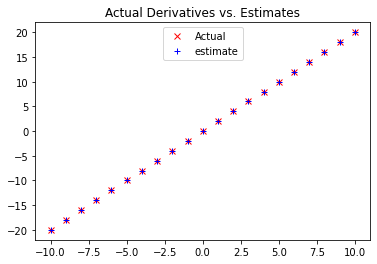


[-19.998999999984335, -17.998999999988996, -15.999000000007868, -13.999000000005424, -11.99900000000298, -9.999000000004088, -7.998999999999867, -5.998999999999199, -3.9989999999994197, -1.998999999999973, 0.001, 2.0009999999996975, 4.000999999999699, 6.000999999999479, 8.0010000000037, 10.001000000002591, 12.001000000005035, 14.00100000000748, 16.000999999988608, 18.000999999983947, 20.000999999993496]

[-20, -18, -16, -14, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]


In [14]:
xs = range(-10, 11)
actuals = [derivative(x) for x in xs]
estimates = [difference_quotient(square, x, h = 0.001) for x in xs]

plt.title("Actual Derivatives vs. Estimates")
plt.plot(xs, actuals, 'rx', label = 'Actual')
plt.plot(xs, estimates, 'b+', label = 'estimate')
plt.legend(loc = 9)
plt.show()

print();print(estimates);print();print(actuals)

In [15]:
Vector = List[float]

def partial_difference_quotient(f: Callable[[Vector], float],
                                v: Vector,
                                i: int,
                                h: float) -> float:
                  
                  w = [v_j + (h if j == i else 0)
                        for j, v_j in enumerate(v)]
                  return (f(w)- f(v))/h

def estimate_gradient(f: Callable[[Vector], float],
                      v: Vector,
                      h: float = 0.0001):
  return [partial_difference_quotient(f, v, i, h)
          for i in range(len(v))]

In [16]:
import random

def gradient_step(v: Vector, gradient: Vector, step_size: float) -> Vector:
  """Moves 'step-size' in the 'gradient' direction from 'v' """
  assert len(v) == len(gradient)
  step = scalar_multiply(step_size, gradient)
  return add(v, step)

def sum_of_squares_gradient(v: Vector) -> Vector:
  return [2 * v_i for v_i in v]

v = [random.uniform(-10, 10) for i in range(3)]


In [17]:
for epoch in range(1000):
  grad = sum_of_squares_gradient(v)
  v = gradient_step(v, grad, -0.01)
  print(epoch, v)

0 [9.567107527590867, 4.674831969907579, -6.536854668821722]
1 [9.37576537703905, 4.581335330509428, -6.406117575445288]
2 [9.188250069498269, 4.489708623899239, -6.277995223936382]
3 [9.004485068108304, 4.399914451421254, -6.152435319457655]
4 [8.824395366746138, 4.311916162392829, -6.029386613068501]
5 [8.647907459411215, 4.225677839144972, -5.908798880807131]
6 [8.474949310222991, 4.141164282362073, -5.790622903190989]
7 [8.305450324018532, 4.058340996714832, -5.674810445127169]
8 [8.139341317538161, 3.9771741767805353, -5.561314236224625]
9 [7.976554491187398, 3.8976306932449245, -5.450087951500133]
10 [7.81702340136365, 3.819678079380026, -5.34108619247013]
11 [7.660682933336377, 3.7432845177924254, -5.234264468620728]
12 [7.507469274669649, 3.668418827436577, -5.129579179248313]
13 [7.357319889176257, 3.5950504508878454, -5.026987595663346]
14 [7.210173491392731, 3.5231494418700886, -4.926447843750079]
15 [7.065970021564876, 3.452686453032687, -4.827918886875078]
16 [6.9246506211

In [18]:
print(distance(v, [0,0,0]) < 0.001)

True


# Using Gradient Descent to fit models

In [19]:
inputs = [(x, 20 * x + 5) for x in range(-50,50)]
print(inputs[:3])

[(-50, -995), (-49, -975), (-48, -955)]


In [20]:
def linear_gradient(x: float, y: float, theta: Vector) -> Vector:
  slope, intercept = theta
  predicted = slope * x + intercept
  #prediction of the model
  error = (predicted - y)
  #error is (predicted - actual)o
  squared_error = error ** 2
  #we'll minimize squared error
  grad = [2 * error * x, 2 * error]
  return grad


In [21]:
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]
learning_rate = 0.001

In [22]:
for epoch in range(5000):
  #Compute the mean of the gradients
  grad = vector_mean([linear_gradient(x, y, theta) for x, y in inputs])
  theta = gradient_step(theta, grad, -learning_rate)
  #Take a step in that direction
  print(epoch, theta)

slope, intercept = theta

Streaming output truncated to the last 5000 lines.
1 [11.379144710146008, 0.8962796334979465]
2 [25.746006757966114, 0.8958662189410965]
3 [16.163309358655546, 0.9098204932611804]
4 [22.554982478270016, 0.9141641616333136]
5 [18.29174085115553, 0.924890815788317]
6 [21.13533374309505, 0.9313327750078959]
7 [19.23866372613061, 0.9406054432009752]
8 [20.503751900114082, 0.9479628960407038]
9 [19.65994544551995, 0.9565707221487365]
10 [20.22277295856034, 0.964317526149959]
11 [19.847374754166403, 0.9726116640562193]
12 [20.097773650635066, 0.9805138154822733]
13 [19.930765488841892, 0.9886505615019439]
14 [20.04216806950396, 0.9966040258677819]
15 [19.967870501666727, 1.0046529858855502]
16 [20.017435028374177, 1.0126115504154458]
17 [19.98438344762484, 1.020603762342989]
18 [20.006436844196575, 1.028546938265928]
19 [19.99173517185915, 1.0364962812335927]
20 [20.001549136651178, 1.0444150238429848]
21 [19.99501114087751, 1.05232774293195]
22 [19.999379896777633, 1.0602180985869636]
23 [1

In [23]:
assert 19.9 < slope < 20.1, "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

# Minibatch and Stochastic Gradient Descent

In [24]:
from typing import TypeVar, List, Iterator

In [26]:
T = TypeVar("T") # this allow us to type "generic" Function

In [31]:
def minibatches(dataset: List[T],
                batch_size: int,
                shuffle: bool = True) -> Iterator[List[T]]:
                '''Generates "batch_size" - sized minibatches from the dataset'''
                #start indexed 0, batch_size, 2 * batch_size
                batch_starts = [start for start in range(0, len(dataset), batch_size)]
                if shuffle: random.shuffle(batch_starts)
                #shuffle the batches
                for start in batch_starts:
                  end = start + batch_size
                  yield dataset[start: end]

In [32]:
theta = [random.uniform(-1, 1), random.uniform(-1,1)]

In [33]:
for epoch in range(1000):
  for batch in minibatches(inputs, batch_size = 20):
    grad = vector_mean([linear_gradient(x, y, theta) for x, y in batch])
    theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)

Streaming output truncated to the last 5000 lines.
0 [27.451652005071466, 0.07212497844624033]
0 [26.947463445710124, 0.0894323804944193]
0 [3.296547315738387, 0.6619980548359508]
0 [18.268720820611946, -0.01416750132844724]
1 [19.633410168762445, -0.07512161268070053]
1 [20.13450970209045, -0.05067436603707451]
1 [20.104830556445116, -0.051199283770145876]
1 [19.344815542037928, -0.032605610130551146]
1 [19.383680295111255, -0.02319558336825211]
2 [21.744723645677784, 0.035540064484695405]
2 [20.49545112818735, -0.022575237825707556]
2 [19.84015137017057, 0.007783408905625254]
2 [19.84586901177805, 0.017607993457984576]
2 [19.958171676827018, 0.015088167425090563]
3 [20.187175261561496, 0.02668929569398671]
3 [20.16966120833257, 0.03682309236416024]
3 [20.021041913079895, 0.033346210721158745]
3 [19.798324092555998, 0.04414223673599213]
3 [20.07190887594669, 0.03771820375955596]
4 [20.205969225592156, 0.044838321190115944]
4 [19.815993509148864, 0.0631933827970141]
4 [20.0319818980341

In [34]:
slope, intercept = theta
print(f"slope is {slope}, and intercept is {intercept}")

slope is 19.999999979617236, and intercept is 4.999999285250974


In [35]:
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

In [37]:
for epoch in range(100):
  for x, y in inputs:
    grad = linear_gradient(x, y, theta)
    theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)

Streaming output truncated to the last 5000 lines.
50 [20.380648951357884, 4.345239484019222]
50 [18.563761573966598, 4.383091304381541]
50 [24.85107352279403, 4.249318709725638]
50 [4.25226769562445, 4.697118836403238]
50 [68.00332422362172, 3.280428691336632]
50 [-118.01686944540398, 7.50816036563267]
50 [392.5852155551444, -4.366306727403338]
50 [-922.6821946885069, 26.9495839926836]
50 [2248.4152097416527, -50.39425513975932]
50 [-4886.945001842817, 127.98975014985241]
50 [10049.574894274723, -254.99793949418705]
50 [-18935.597243792236, 507.76974834968036]
50 [33002.03297108879, -895.9499871876444]
50 [-52552.26488905087, 1480.5582867051237]
50 [76353.07316919311, -2202.4513721018475]
50 [-100279.09869128431, 2992.6125061474886]
50 [118369.52068373864, -3633.1032324895705]
50 [-124243.13628343743, 3948.5422977346816]
50 [114835.11127578889, -3763.6592364339094]
50 [-92058.20857481717, 3132.784758586292]
50 [62998.74976402332, -2214.0069082702767]
50 [-35876.19425282837, 1317.24109

In [39]:
slope, intercept = theta
print(f"slope is {slope}, and intercept is {intercept}")

slope is 20.00145156066083, and intercept is 4.927752631358783
